In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

# Lets Take a look at Non-Null Values

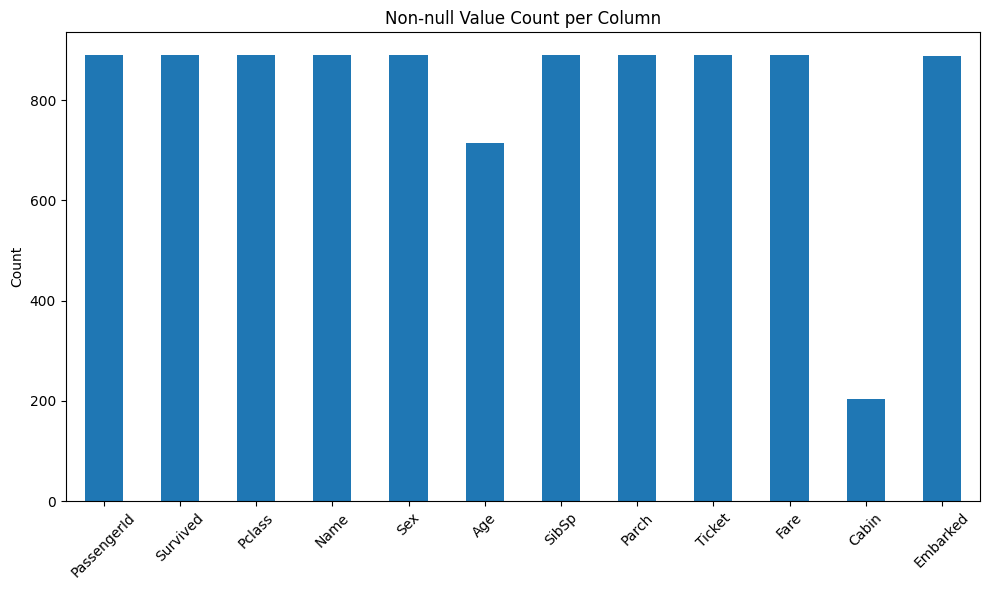

In [6]:
non_null_count = df.count()

# Plot of non null values
plt.figure(figsize=(10, 6))
non_null_count.plot(kind='bar')
plt.title('Non-null Value Count per Column')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
null_count = df.isnull().sum()
null_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Lets Take a look at Null Values

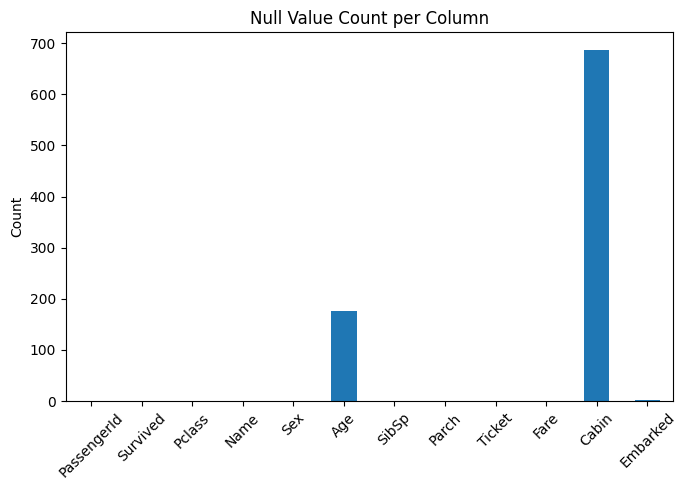

In [8]:
# Plot of null values

plt.figure(figsize=(7, 5))
null_count.plot(kind='bar')
plt.title('Null Value Count per Column')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The Cabin Column has the most nulll count so we will drop the column

In [9]:
df.drop(columns=["Cabin"],inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## The Age Column is missing some values 
#### Since its numerical values we will use median values based on Pclass and Sex Columns

In [11]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [12]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
dtype: int64

## If you notice the Embarked column is also missing some values
#### Since it is a categorical data we will use the most common value to fill the empty data

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

# Lets convert the categorical data to numerical feautures using encoding

In [15]:
# We will use 1 for male and 0 for female 

df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [16]:
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [17]:
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [18]:
df["Embarked"]

0      1
1      2
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    2
890    3
Name: Embarked, Length: 891, dtype: int64

# Since i plan to use Tree based models I have no need for normalization or standardization
### But if you are using any linear model like Logistic regression, SVM, KNN 
### Here is the code for Standardization

In [19]:
'''from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale (adjust as needed)
numeric_cols = ['Age', 'Fare']

# Create scaler
scaler = StandardScaler()

# Fit scaler on numeric columns and transform
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display scaled columns
print(df_scaled[numeric_cols].head())'''
# Just uncomment these

"from sklearn.preprocessing import StandardScaler\n\n# Select numeric columns to scale (adjust as needed)\nnumeric_cols = ['Age', 'Fare']\n\n# Create scaler\nscaler = StandardScaler()\n\n# Fit scaler on numeric columns and transform\ndf_scaled = df.copy()\ndf_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])\n\n# Display scaled columns\nprint(df_scaled[numeric_cols].head())"

## Outliers Visualization using Box Plots

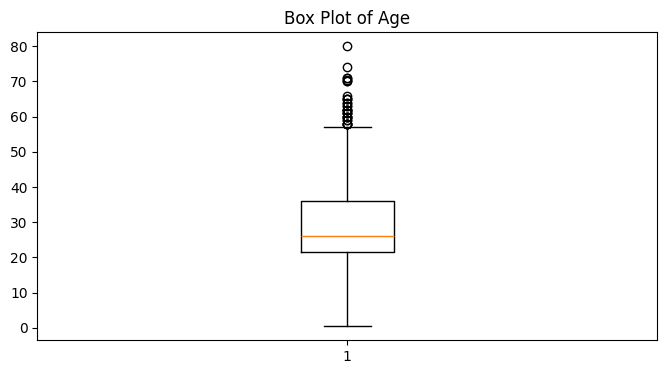

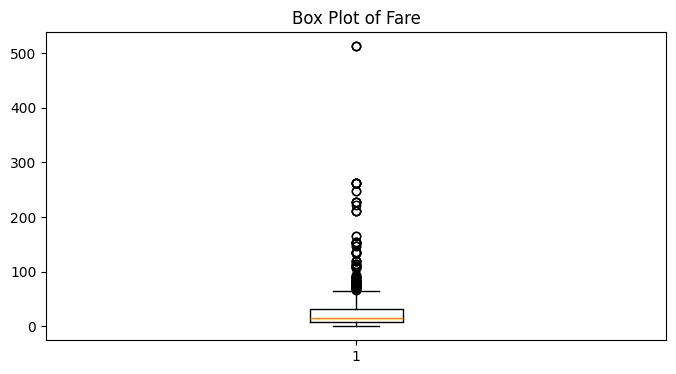

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.boxplot(df['Age'].dropna())
plt.title('Box Plot of Age')
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot(df['Fare'].dropna())
plt.title('Box Plot of Fare')
plt.show()

In [21]:
# 
df['Fare_log'] = np.log1p(df['Fare'])

In [22]:
df['Fare_log']

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Fare_log, Length: 891, dtype: float64

### Dropping Irrelevant columns for Training

In [23]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

x = df.drop("Survived",axis=1)
y = df['Survived']
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train,Y_train)

y_pred = logistic_model.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8161434977578476
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223



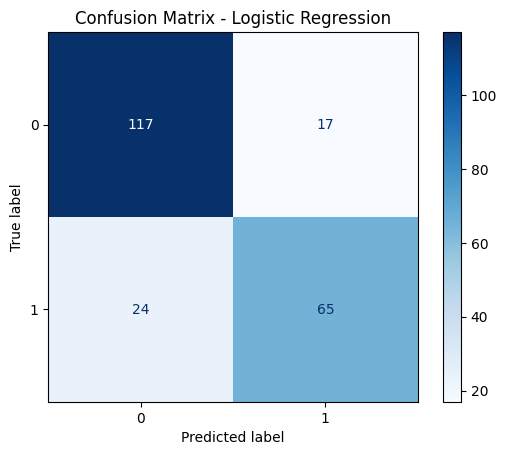

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels
y_pred = logistic_model.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


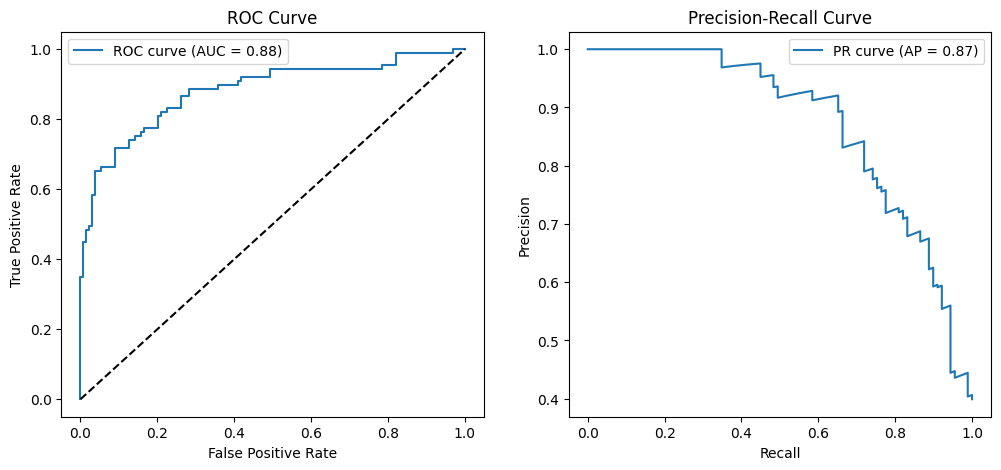

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_probs = logistic_model.predict_proba(x_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(recall, precision, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
